In [1]:
# 导入必要的库
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, load_iris,make_moons
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,precision_recall_curve, roc_curve, f1_score, auc

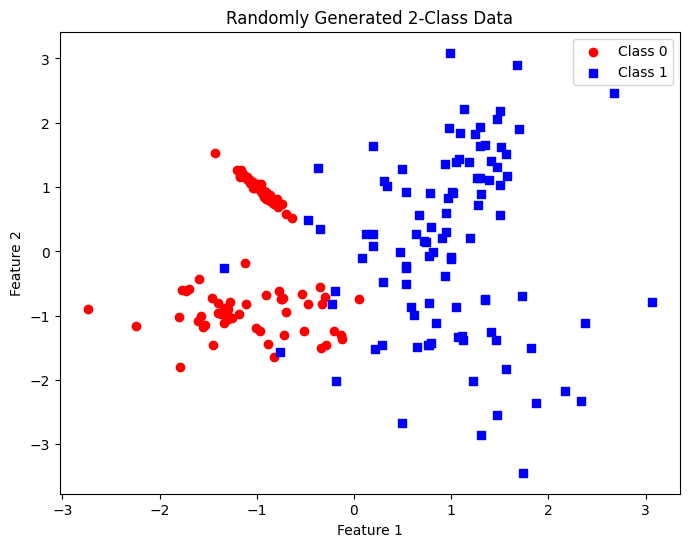

In [2]:
# 1. 随机化两类数据，运用SVM进行硬分隔和软分隔
# 创建具有两类的随机二维数据集
X, y = make_classification(n_samples=200, n_features=2,n_informative=2, n_redundant=0, random_state=25)

# 画出原始数据点
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red',marker='o', label='Class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue',marker='s', label='Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Randomly Generated 2-Class Data')
plt.legend()
plt.show()

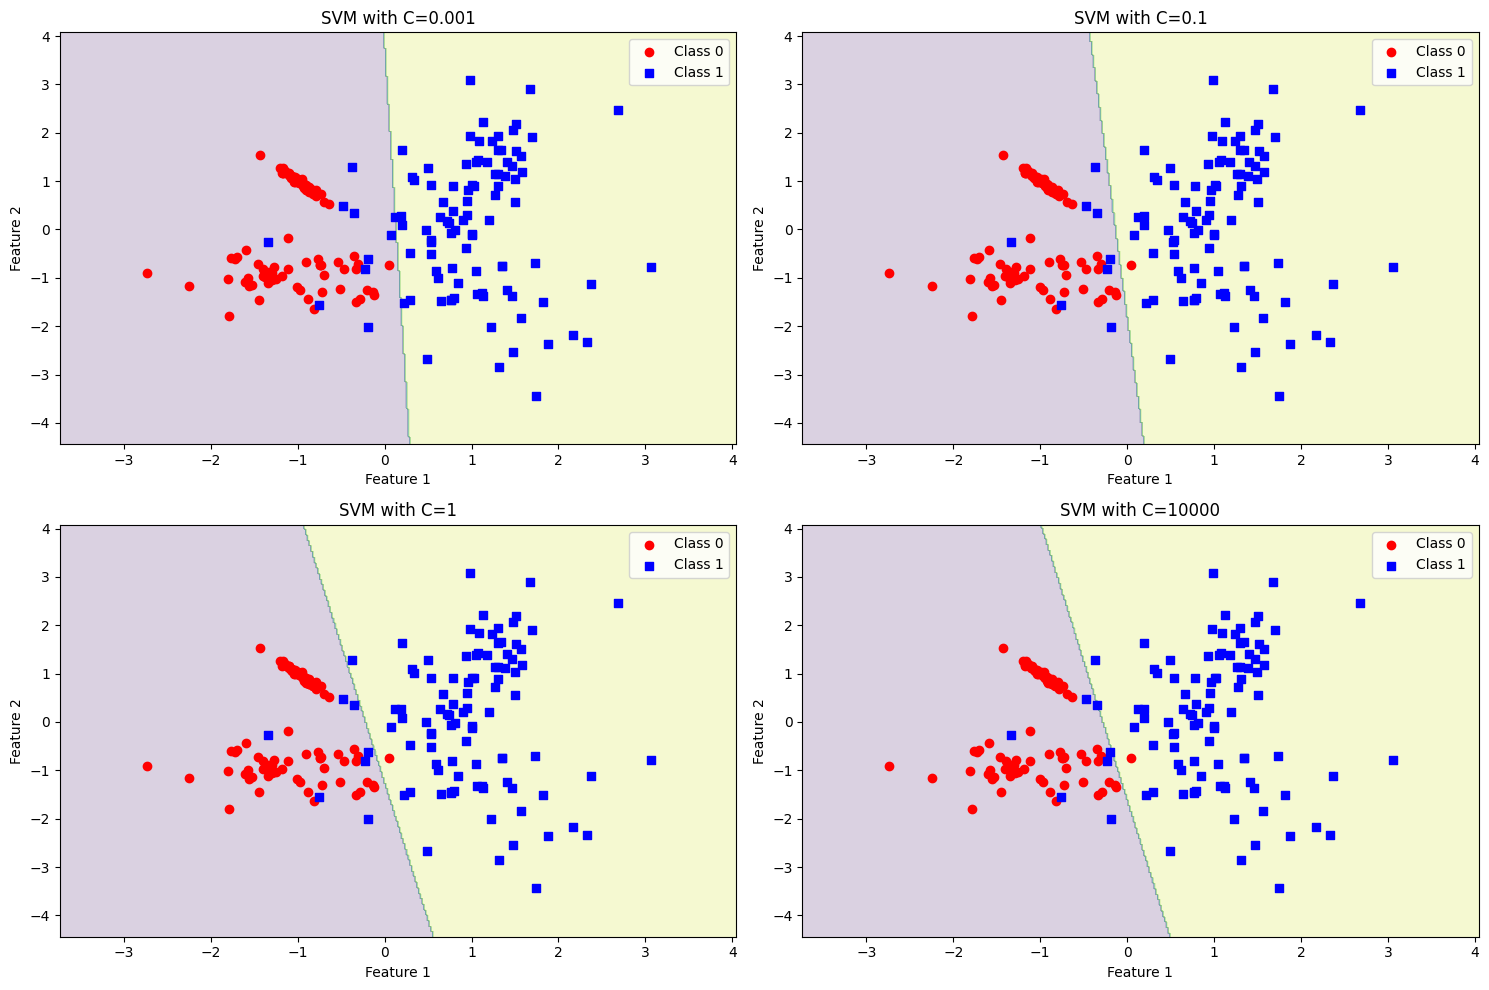

In [3]:
# 不同C值的SVM
C_values = [0.001, 0.1, 1, 10000]
plt.figure(figsize=(15, 10))

for i, C in enumerate(C_values, 1):
    # 创建SVM模型
    svm = SVC(C=C, kernel='linear', random_state=25)
    # 训练模型
    svm.fit(X, y)
    
    # 绘制决策边界
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.subplot(2, 2, i)
    plt.contourf(xx, yy, Z, alpha=0.2)
    plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', marker='o', label='Class 0')
    plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', marker='s', label='Class 1')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'SVM with C={C}')
    plt.legend()

plt.tight_layout()
plt.show()

原始数据集样本数: 150, 特征数: 4
特征名称: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
类别名称: ['setosa' 'versicolor' 'virginica']
原始标签分布: [50 50 50]
处理后数据集样本数: 100, 特征数: 2
二分类标签分布: [50 50]
测试集精度: 1.0000


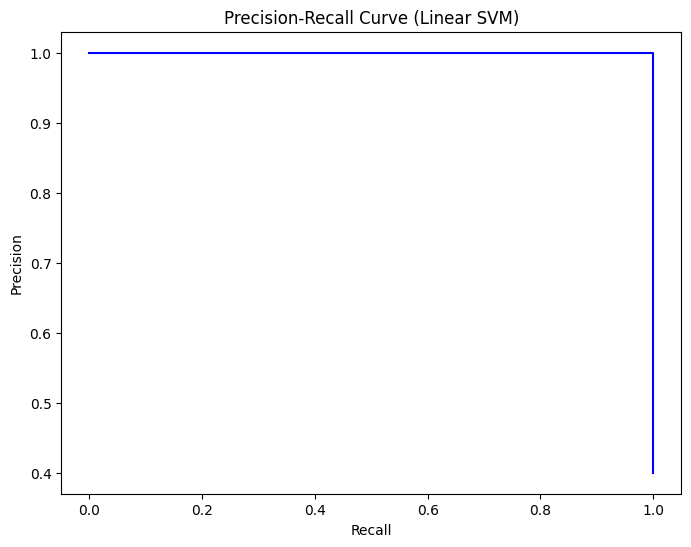

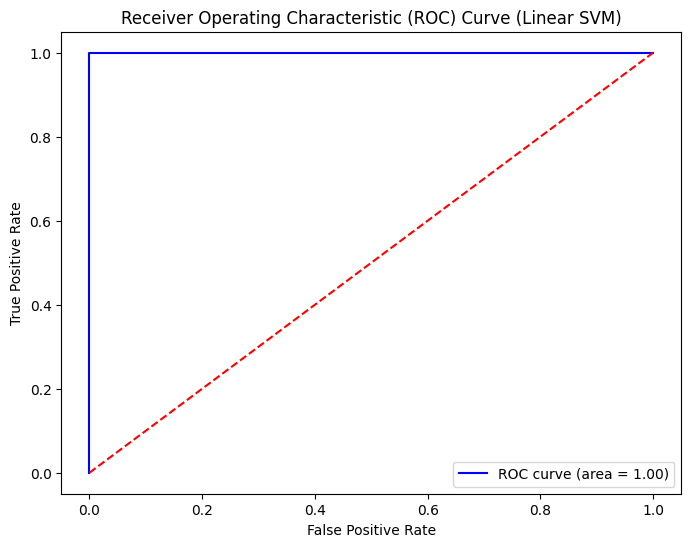

F1值: 1.0000


In [4]:
# 2. 基于鸢尾花数据集，运用SVM进行线性分类
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_recall_curve, roc_curve, auc, f1_score
import matplotlib.pyplot as plt
import numpy as np

# 加载鸢尾花数据集
iris = load_iris()
X = iris.data
y = iris.target

# 输出原始数据集的基本信息
print(f"原始数据集样本数: {X.shape[0]}, 特征数: {X.shape[1]}")
print(f"特征名称: {iris.feature_names}")
print(f"类别名称: {iris.target_names}")
print(f"原始标签分布: {np.bincount(y)}")

# 由于SVM是二分类模型，我们只取前两类
X = X[:100, :2]
y = y[:100]

# 输出处理后数据的信息
print(f"处理后数据集样本数: {X.shape[0]}, 特征数: {X.shape[1]}")
print(f"二分类标签分布: {np.bincount(y)}")

# 数据分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 特征标准化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 使用SVM线性核进行训练，添加probability=True以支持概率预测
svm_linear = SVC(kernel='linear', C=1.0, probability=True, random_state=42)
svm_linear.fit(X_train, y_train)

# 预测
y_pred = svm_linear.predict(X_test)

# 评估
accuracy = accuracy_score(y_test, y_pred)
print(f"测试集精度: {accuracy:.4f}")

# 绘制PR曲线
y_prob = svm_linear.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Linear SVM)')
plt.show()

# 绘制ROC曲线
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Linear SVM)')
plt.legend()
plt.show()

# 计算F1值
f1 = f1_score(y_test, y_pred)
print(f"F1值: {f1:.4f}")

数据集形状: (200, 2)
特征数量: 2
样本数量: 200
标签形状: (200,)
标签类别: [0 1]
各类别样本数量:
  类别 0: 100 个样本
  类别 1: 100 个样本


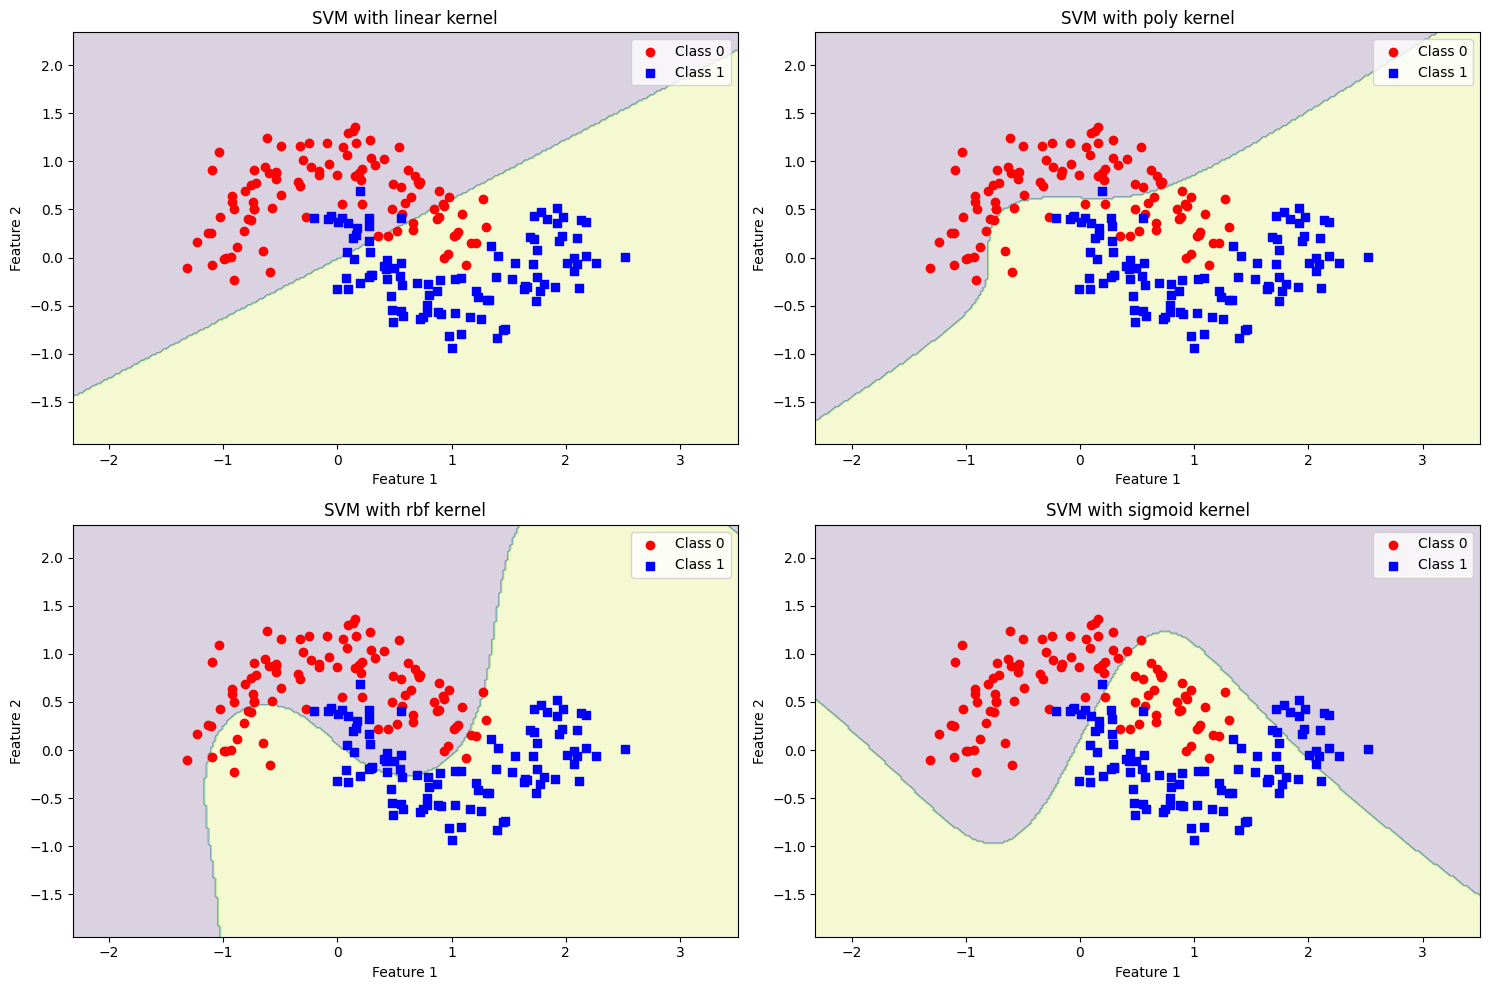

linear kernel accuracy: 0.9000


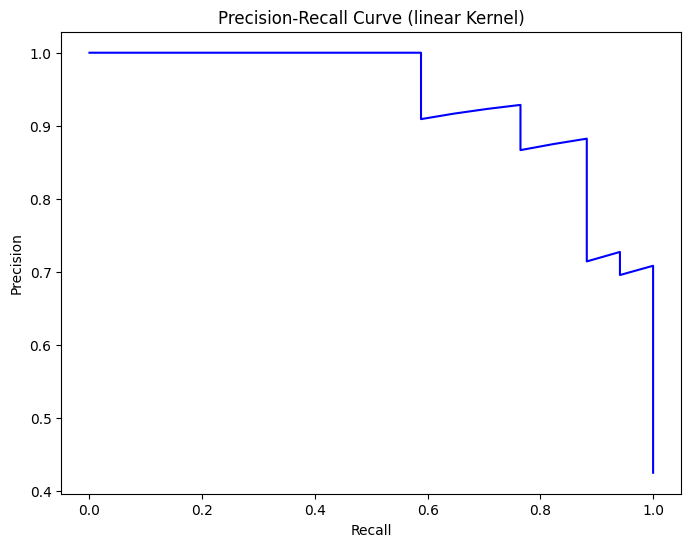

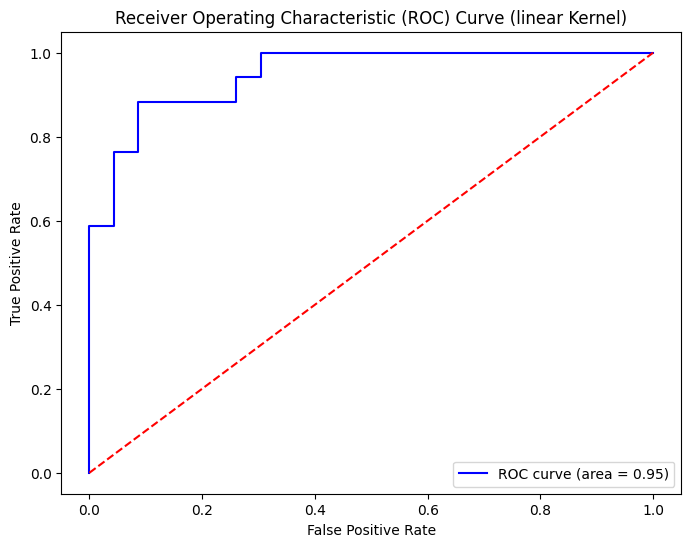

linear kernel F1 score: 0.8824
poly kernel accuracy: 0.8500


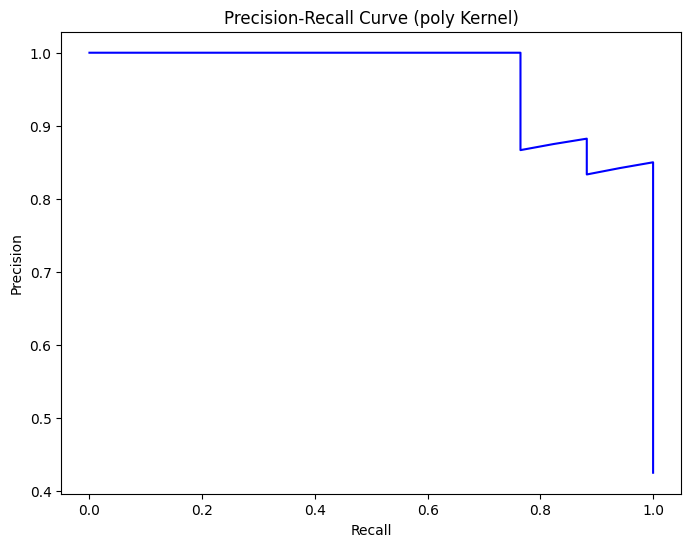

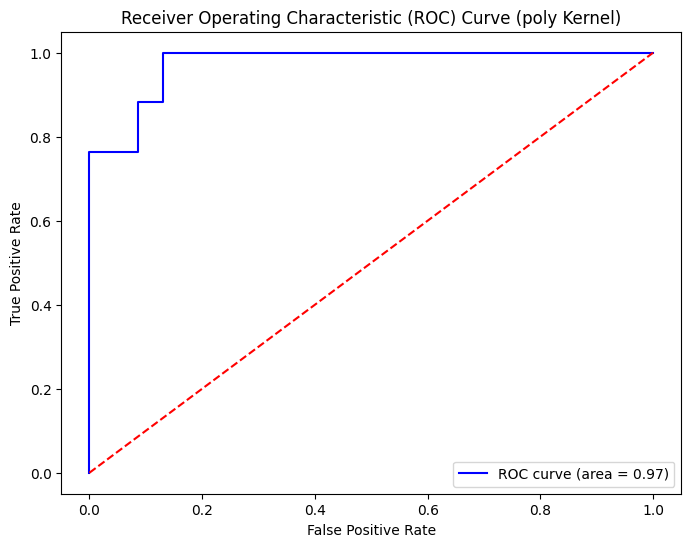

poly kernel F1 score: 0.8500
rbf kernel accuracy: 0.9250


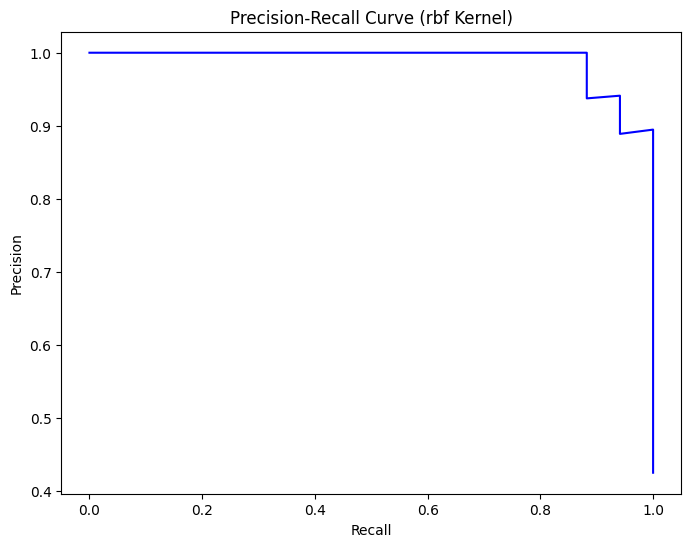

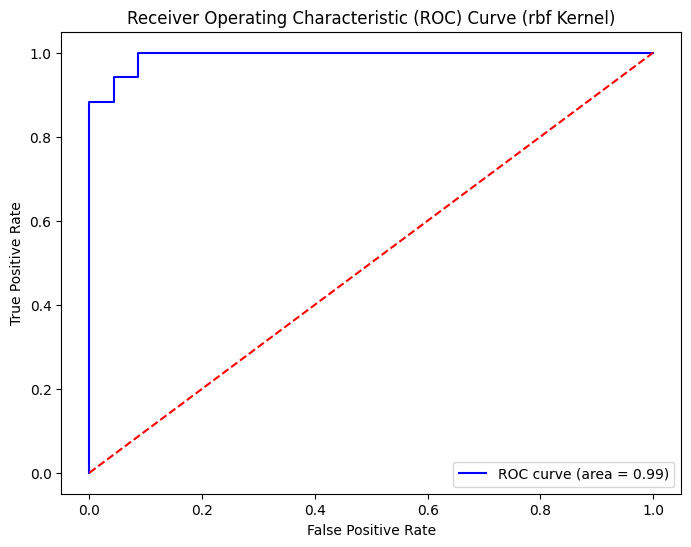

rbf kernel F1 score: 0.9143
sigmoid kernel accuracy: 0.8000


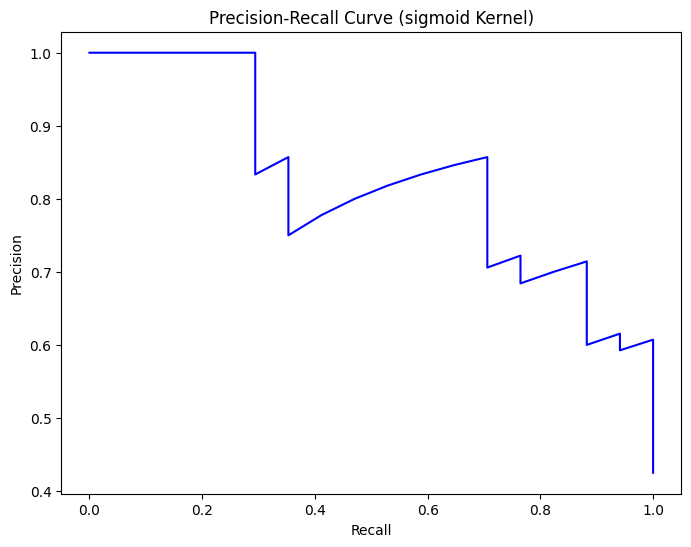

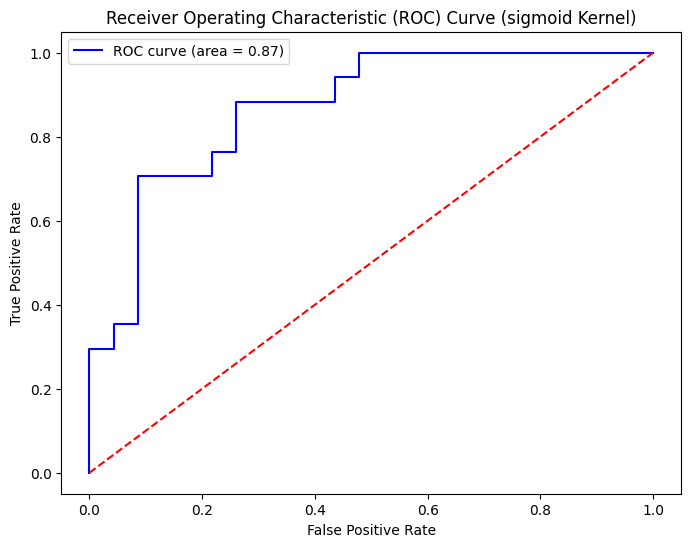

sigmoid kernel F1 score: 0.7895


In [5]:
# 3. 基于卫星数据集，采用SVM核技巧实现非线性分类
# 加载卫星数据集
X, y = make_moons(n_samples=200, noise=0.2, random_state=25)

print(f"数据集形状: {X.shape}")
print(f"特征数量: {X.shape[1]}")
print(f"样本数量: {X.shape[0]}")
print(f"标签形状: {y.shape}")
print(f"标签类别: {np.unique(y)}")
print(f"各类别样本数量:")
unique, counts = np.unique(y, return_counts=True)
for label, count in zip(unique, counts):
    print(f"  类别 {label}: {count} 个样本")

# 数据分割
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=25)

# 特征标准化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 定义核函数
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
plt.figure(figsize=(15, 10))
for i, kernel in enumerate(kernels, 1):
    # 创建SVM模型，添加probability=True以支持概率预测
    svm = SVC(kernel=kernel, C=1.0, probability=True, random_state=25)
    # 训练模型
    svm.fit(X_train, y_train)
    
    # 绘制决策边界
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.subplot(2, 2, i)
    plt.contourf(xx, yy, Z, alpha=0.2)
    plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', marker='o', label='Class 0')
    plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', marker='s', label='Class 1')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'SVM with {kernel} kernel')
    plt.legend()
plt.tight_layout()
plt.show()

# 评估不同核函数的性能
for kernel in kernels:
    svm = SVC(kernel=kernel, C=1.0, probability=True, random_state=25)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{kernel} kernel accuracy: {accuracy:.4f}")
    
    # 绘制PR曲线
    y_prob = svm.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve ({kernel} Kernel)')
    plt.show()
    
    # 绘制ROC曲线
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='b', label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='r', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve ({kernel} Kernel)')
    plt.legend()
    plt.show()
    
    # 计算F1值
    f1 = f1_score(y_test, y_pred)
    print(f"{kernel} kernel F1 score: {f1:.4f}")